Τελική Εργασία
ΕΔΔΕ2 "Ανάλυση Μεγάλων Δεδομένων μέσω της Γλώσσας Python"
Στo πλαίσιo της τελικής εργασίας σας, ζητείται να αναλύσετε ένα μεγάλο αριθμό δεδομένων
(N>500) τα οποία αναφέρονται σε ένα ελληνικό θέμα και συγκεκριμένα στην ελληνική
ειδησεογραφία με θέμα την Covid-19, με το σύνολο (ή ένα μέρος) των δεδομένων να έχουν
εξορυχθεί από το διαδίκτυο με τεχνικές scraping (Beautiful Soup). Μπορείτε επίσης να
συγκεντρώσετε για την ίδια χρονική περίοδο tweets (και με χρήση workbench). Για την ανάλυση
των δεδομένων σας θα πρέπει να κάνετε τα παρακάτω βήματα επεξεργασίας:
1. Να εξορύξετε τα δεδομένα σας με χρήση των παραπάνω τεχνικών.
2. Τα δεδομένα θα πρέπει να εισαχθούν στην Python σε μορφή dataframe
3. Να κάνετε καθαρισμό των δεδομένων από άχρηστα στοιχεία, NaN values, περιττά κείμενα
και επιπλέον στήλες.
4. Αν απαιτείται, μπορείτε να τα επεξεργαστείτε κατάλληλα (αφαίρεση stopwords,
stemming/lemmatization)
5. Να δημιουργήσετε νέες παραμέτρους ως στήλες στο dataframe όπως o μήνας, ο χρόνος,
ένα ποσοστό κ.λπ.
6. Να πραγματοποιήσετε αναλύσεις στα αριθμητικά δεδομένα σας και να δημιουργήσετε τα
αντίστοιχα γραφήματα, τα οποία δείχνουν χαρακτηριστικά και συσχετίσεις που κρύβουν τα
δεδομένα σας.
7. Μπορείτε να δημιουργήσετε διάφορα γραφήματα από τα κείμενά σας όπως (α) ένα
wordcloud, (β) ένα διάγραμμα με τις 15 πιο συχνές λέξεις και (γ) ένα διάγραμμα με τα πιο
συχνά διγράμματα (bigrams).
8. Χρησιμοποιήστε το πεδίο της ημερομηνίας ως index στο dataframe που θα δημιουργήσετε
ώστε να αξιοποιήσετε τις λειτουργίες της χρονοσειράς (resample()).
9. Κάνοντας χρήση του ελληνικού λεξικού για sentiment anaysis του NRC βρείτε την
πολικότητα (θετική - αρνητική) και τα συναισθήματα των κειμένων σας, και αποθηκεύστε τα
σε νέες στήλες στο dataframe των δεδομένων σας.
10. Δημιουργήστε γραφήματα ομαδοποιώντας μέσω του resample() την πολικότητα των
άρθρων σας ανά ημέρα/μήνα/3μηνο/έτος ανάλογα με το θέμα.
11. Αξιοποιήστε την διανυσματοποίηση των κειμένων σας (CountVectorizer()), και τη χρήση της
ομοιότητας κειμένων μέσω της συνάρτησης cosine_similarity() ώστε να βρείτε άρθρα που
έχουν μεγάλη ομοιότητα. Παρουσιάστε τη συσχέτιση αυτή μέσω γραφήματος τύπου
heatmap.
12. Ανεβάστε τα γραφήματα που κατασκευάσατε στο site: http://helios.media.uoa.gr/datajour/
φτιάχνοντας μια ιστορία (τουλάχιστον 800 λέξεις), αναφέροντας το όνομά σας. Βελτιώστε
όπου είναι δυνατόν την ποιότητα των γραφημάτων μέσω προγραμμάτων όπως το flourish,
datawrapper κ.λπ.
13. Ο κώδικάς σας μαζί με τα δεδομένα θα ανέβει στον προσωπικό σας λογαριασμό στο github
(αν τα δεδομένα υπερβαίνουν το όριο, βάλτε απλά ένα δείγμα ώστε να τρέχει ο κώδικας).
14. Το άρθρο σας σε μορφή pdf με τίτλο Eponimo_teliki_ergasia.zip μαζί με το link για τον
κώδικα (github) θα ανέβει στο eclass.
Η εργασία έχει τελική ημερομηνία παράδοσης: 7/7/2021

Twitter

In [ ]:
!pip install Twython
import pandas as pd
import numpy as np 
from twython import Twython

CONSUMER_KEY = "f6vVvVygpV5xnkTPm9eicXBEf"
CONSUMER_SECRET = "5AHPBg3Pd6cl8Vvj1iV91WHB9ZEQHOYtP5t8q3Bcxnl8VMbuxP"
OAUTH_TOKEN = "1350906426806439936-GKk0wQVM13CAhR1XxBX0nbus4u2vZm"
OAUTH_TOKEN_SECRET = "2nE3HFcPwIzvqvaBCEuGum9smxVYKAK0gkGpFMNTwCTjE"
twitter = Twython(
    CONSUMER_KEY, CONSUMER_SECRET,
    OAUTH_TOKEN, OAUTH_TOKEN_SECRET)

In [ ]:
tweetsL = []
try:
    user_timeline = twitter.get_user_timeline(screen_name='@Kathimerini_gr',count=200, tweet_mode = 'extended'  )
except TwythonError as e:
    print("Error getting tweets:", e)
print("I Got:", len(user_timeline), " tweets")
for tweet in user_timeline:
    tweetsL.append(tweet)

I Got: 200  tweets


In [ ]:
while len(user_timeline) != 0: 
    try:
        user_timeline = twitter.get_user_timeline(screen_name='@Kathimerini_gr',count=100,
                                                  tweet_mode = 'extended', max_id=user_timeline[len(user_timeline)-1]['id']-1)
    except TwythonError as e:
        print("Error getting tweets:", e)
    if len(user_timeline) > 0:
        print("I Got:", len(user_timeline), " tweets more... Last ID:", user_timeline[len(user_timeline)-1]['id']-1)
    for tweet in user_timeline:
        tweetsL.append(tweet)
print("I got :", len(tweetsL), " in total!!!")

I Got: 100  tweets more... Last ID: 1413196552659742722
I Got: 100  tweets more... Last ID: 1412744343471992836
I Got: 100  tweets more... Last ID: 1412323549608546303
I Got: 100  tweets more... Last ID: 1411920984458792962
I Got: 100  tweets more... Last ID: 1411423137602969599
I Got: 100  tweets more... Last ID: 1410929351860781060
I Got: 100  tweets more... Last ID: 1410552520200577023
I Got: 100  tweets more... Last ID: 1410163713362042879
I Got: 100  tweets more... Last ID: 1409791968968953855
I Got: 100  tweets more... Last ID: 1409415706303774726
I Got: 100  tweets more... Last ID: 1408677682267754498
I Got: 100  tweets more... Last ID: 1408084249945772031
I Got: 100  tweets more... Last ID: 1407631441442312194
I Got: 100  tweets more... Last ID: 1407059673505796099
I Got: 100  tweets more... Last ID: 1406531957874479104
I Got: 100  tweets more... Last ID: 1405824964448731135
I Got: 100  tweets more... Last ID: 1405454064318623747
I Got: 100  tweets more... Last ID: 140508399109

In [ ]:
len(tweetsL)

3250

In [ ]:
for tweet in tweetsL:
    print(tweet['created_at'],tweet['full_text'])

Η έξοδος ροής περικόπηκε στις τελευταίες 5000 γραμμές.
 https://t.co/fkjZDT4pQi
Thu Jul 08 05:52:29 +0000 2021 ΗΠΑ: Ξεκινούν οι εμβολιασμοί πόρτα πόρτα
 https://t.co/59vDbEWqe6
Thu Jul 08 05:50:58 +0000 2021 Συναγερμός στο λιμάνι της Ραφήνας για ύποπτα κρούσματα σε πλοίο από την Ίο https://t.co/zERMPZA55X #kathimerini #καθημερινη #κορωνοιος
Thu Jul 08 05:28:15 +0000 2021 Γιάννης Παπαδόπουλος: Το τείχος των δύσπιστων
 https://t.co/o2k6Frj9NK
Thu Jul 08 05:26:07 +0000 2021 Πυρκαγιά στη Χίο
 https://t.co/qj3PXNMzva
Thu Jul 08 05:11:10 +0000 2021 Αφγανιστάν: Συνομιλίες ΗΠΑ – Τουρκίας για το αεροδρόμιο της Καμπούλ
 https://t.co/mKXEzbVmaN
Thu Jul 08 05:03:41 +0000 2021 Κατάρρευση κτιρίου στη Φλόριντα: Σταματούν οι έρευνες για επιζώντες
 https://t.co/9cWNjkv1oH
Thu Jul 08 04:56:35 +0000 2021 Διονύσης Γουσέτης: Το τόλμημα Κεραμέως στα σχολεία
 https://t.co/Z0PCs2mV79
Thu Jul 08 04:53:58 +0000 2021 Ιράκ: Ρουκέτες εκτοξεύθηκαν κατά της πρεσβείας των ΗΠΑ
 https://t.co/Hyj2I8L1te
Thu Jul 08 04:48

In [ ]:
tweetsL[0]['full_text']

'«Ας μην επαναπαυόμαστε» είναι το μήνυμα που στέλνει εμφατικά με συνέντευξη στην «Κ» η δρ Μαριάννα Τρίας, εκπρόσωπος του Παγκόσμιου Οργανισμού Υγείας στην Ελλάδα, όσον αφορά τη μάχη με τον κορωνοϊό.  https://t.co/rXXWP6Hwfh'

In [ ]:
tweetsL[0]

{'contributors': None,
 'coordinates': None,
 'created_at': 'Mon Jul 12 19:30:19 +0000 2021',
 'display_text_range': [0, 222],
 'entities': {'hashtags': [],
  'symbols': [],
  'urls': [{'display_url': 'kathimerini.gr/society/561429…',
    'expanded_url': 'https://www.kathimerini.gr/society/561429235/prostateytheite-me-odigo-tin-koini-logiki/',
    'indices': [199, 222],
    'url': 'https://t.co/rXXWP6Hwfh'}],
  'user_mentions': []},
 'favorite_count': 2,
 'favorited': False,
 'full_text': '«Ας μην επαναπαυόμαστε» είναι το μήνυμα που στέλνει εμφατικά με συνέντευξη στην «Κ» η δρ Μαριάννα Τρίας, εκπρόσωπος του Παγκόσμιου Οργανισμού Υγείας στην Ελλάδα, όσον αφορά τη μάχη με τον κορωνοϊό.  https://t.co/rXXWP6Hwfh',
 'geo': None,
 'id': 1414668463424118791,
 'id_str': '1414668463424118791',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'e

In [ ]:
tweets_df = pd.DataFrame(tweetsL)

In [ ]:
tweets_df.head()

created_at                   id  ... lang extended_entities
0  Mon Jul 12 19:30:19 +0000 2021  1414668463424118791  ...   el               NaN
1  Mon Jul 12 19:24:54 +0000 2021  1414667101122539527  ...   el               NaN
2  Mon Jul 12 19:08:27 +0000 2021  1414662960899842052  ...   el               NaN
3  Mon Jul 12 18:40:03 +0000 2021  1414655814065864704  ...   el               NaN
4  Mon Jul 12 18:25:52 +0000 2021  1414652245036130305  ...   el               NaN

[5 rows x 26 columns]

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
tweets_df.to_csv("/content/gdrive/My Drive/Colab Notebooks/KathimeriniTweets.tsv", sep='\t')

In [ ]:
import pandas as pd
data = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/KathimeriniTweets.tsv", sep="\t")
data


Unnamed: 0                      created_at  ...  lang  extended_entities
0              0  Mon Jul 12 19:30:19 +0000 2021  ...    el                NaN
1              1  Mon Jul 12 19:24:54 +0000 2021  ...    el                NaN
2              2  Mon Jul 12 19:08:27 +0000 2021  ...    el                NaN
3              3  Mon Jul 12 18:40:03 +0000 2021  ...    el                NaN
4              4  Mon Jul 12 18:25:52 +0000 2021  ...    el                NaN
...          ...                             ...  ...   ...                ...
3245        3245  Mon May 31 11:52:17 +0000 2021  ...    el                NaN
3246        3246  Mon May 31 11:51:43 +0000 2021  ...    el                NaN
3247        3247  Mon May 31 11:29:26 +0000 2021  ...    el                NaN
3248        3248  Mon May 31 11:29:01 +0000 2021  ...    el                NaN
3249        3249  Mon May 31 11:16:31 +0000 2021  ...    el                NaN

[3250 rows x 27 columns]

In [ ]:
def load_tweets():
    return pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/KathimeriniTweets.tsv", delimiter="\t")

data = load_tweets()
tweets = data["full_text"]
print(tweets)


0       «Ας μην επαναπαυόμαστε» είναι το μήνυμα που στ...
1       Ακυρώθηκε το Ολυμπιακός – Γαλατασαράι: «Εμπλοκ...
2       Τον υποχρεωτικό εμβολιασμό για τους εργαζόμενο...
3       Σαφείς κυρώσεις θα ακολουθούν την απόφαση των ...
4       Νέοι που αδημονούν να ξεκινήσουν την ενήλικη ζ...
                              ...                        
3245    Το αντι-Ν.Δ. μέτωπο και το «φάντασμα» της πρόω...
3246    AudioPrints #16: Χωρίς ανάσες στη στέγη του κό...
3247    Άμεση ανάλυση: Μικρό αλλά σημαντικό βήμα προς ...
3248    Τρίτη εισαγγελική παρέμβαση σε 15 ημέρες για τ...
3249    Κομισιόν: Κανένας ταξιδιωτικός περιορισμός για...
Name: full_text, Length: 3250, dtype: object


In [ ]:
tweets_lower = list(map(lambda x:x.lower(),tweets))
print (tweets_lower)

['«ας μην επαναπαυόμαστε» είναι το μήνυμα που στέλνει εμφατικά με συνέντευξη στην «κ» η δρ μαριάννα τρίας, εκπρόσωπος του παγκόσμιου οργανισμού υγείας στην ελλάδα, όσον αφορά τη μάχη με τον κορωνοϊό.  https://t.co/rxxwp6hwfh', 'ακυρώθηκε το ολυμπιακός – γαλατασαράι: «εμπλοκή» στο αεροδρόμιο με τα τεστ των τούρκων https://t.co/yzks8q5myg', 'τον υποχρεωτικό εμβολιασμό για τους εργαζόμενους στον υγειονομικό τομέα ανακοίνωσε ο  μακρόν https://t.co/6iernjoukj', 'σαφείς κυρώσεις θα ακολουθούν την απόφαση των υγειονομικών να μην εμβολιαστούν https://t.co/xlkaug8zv9', 'νέοι που αδημονούν να ξεκινήσουν την ενήλικη ζωή τους https://t.co/ksn5h0j2ay', 'γλυκά νερά: βραβεύτηκαν οι αστυνομικοί που εξιχνίασαν την ανθρωποκτονία #kathimerini #καθημερινη\nhttps://t.co/beqqrua0di', 'σε πλήρη εφαρμογή τίθεται το σχέδιο που προβλέπει υποχρεωτικούς εμβολιασμούς. τι δηλώνει στην «κ» ο πρόεδρος της ένωσης μονάδων φροντίδας ηλικιωμένων https://t.co/2uwcyp2cpd', 'μπόρις τζόνσον: η άρση μέτρων θα λειτουργήσει μόν

In [ ]:
#diagrafi ReTweet 
import re

tweets_as_string = ''.join(tweets_lower)

rt_regex = re.sub('rt @', " ", tweets_as_string)
rt_regex

'«ας μην επαναπαυόμαστε» είναι το μήνυμα που στέλνει εμφατικά με συνέντευξη στην «κ» η δρ μαριάννα τρίας, εκπρόσωπος του παγκόσμιου οργανισμού υγείας στην ελλάδα, όσον αφορά τη μάχη με τον κορωνοϊό.  https://t.co/rxxwp6hwfhακυρώθηκε το ολυμπιακός – γαλατασαράι: «εμπλοκή» στο αεροδρόμιο με τα τεστ των τούρκων https://t.co/yzks8q5mygτον υποχρεωτικό εμβολιασμό για τους εργαζόμενους στον υγειονομικό τομέα ανακοίνωσε ο  μακρόν https://t.co/6iernjoukjσαφείς κυρώσεις θα ακολουθούν την απόφαση των υγειονομικών να μην εμβολιαστούν https://t.co/xlkaug8zv9νέοι που αδημονούν να ξεκινήσουν την ενήλικη ζωή τους https://t.co/ksn5h0j2ayγλυκά νερά: βραβεύτηκαν οι αστυνομικοί που εξιχνίασαν την ανθρωποκτονία #kathimerini #καθημερινη\nhttps://t.co/beqqrua0diσε πλήρη εφαρμογή τίθεται το σχέδιο που προβλέπει υποχρεωτικούς εμβολιασμούς. τι δηλώνει στην «κ» ο πρόεδρος της ένωσης μονάδων φροντίδας ηλικιωμένων https://t.co/2uwcyp2cpdμπόρις τζόνσον: η άρση μέτρων θα λειτουργήσει μόνο αν είμαστε προσεκτικοί #kat

In [ ]:
#diagrafi tags

usernames_regex = re.sub(r"@[^ \.]+", " ", rt_regex)
usernames_regex


'«ας μην επαναπαυόμαστε» είναι το μήνυμα που στέλνει εμφατικά με συνέντευξη στην «κ» η δρ μαριάννα τρίας, εκπρόσωπος του παγκόσμιου οργανισμού υγείας στην ελλάδα, όσον αφορά τη μάχη με τον κορωνοϊό.  https://t.co/rxxwp6hwfhακυρώθηκε το ολυμπιακός – γαλατασαράι: «εμπλοκή» στο αεροδρόμιο με τα τεστ των τούρκων https://t.co/yzks8q5mygτον υποχρεωτικό εμβολιασμό για τους εργαζόμενους στον υγειονομικό τομέα ανακοίνωσε ο  μακρόν https://t.co/6iernjoukjσαφείς κυρώσεις θα ακολουθούν την απόφαση των υγειονομικών να μην εμβολιαστούν https://t.co/xlkaug8zv9νέοι που αδημονούν να ξεκινήσουν την ενήλικη ζωή τους https://t.co/ksn5h0j2ayγλυκά νερά: βραβεύτηκαν οι αστυνομικοί που εξιχνίασαν την ανθρωποκτονία #kathimerini #καθημερινη\nhttps://t.co/beqqrua0diσε πλήρη εφαρμογή τίθεται το σχέδιο που προβλέπει υποχρεωτικούς εμβολιασμούς. τι δηλώνει στην «κ» ο πρόεδρος της ένωσης μονάδων φροντίδας ηλικιωμένων https://t.co/2uwcyp2cpdμπόρις τζόνσον: η άρση μέτρων θα λειτουργήσει μόνο αν είμαστε προσεκτικοί #kat

In [ ]:
#diagrafi hashtags
hashtags_regex = re.sub(r"#[^ \.]+"," ",usernames_regex)
hashtags_regex


'«ας μην επαναπαυόμαστε» είναι το μήνυμα που στέλνει εμφατικά με συνέντευξη στην «κ» η δρ μαριάννα τρίας, εκπρόσωπος του παγκόσμιου οργανισμού υγείας στην ελλάδα, όσον αφορά τη μάχη με τον κορωνοϊό.  https://t.co/rxxwp6hwfhακυρώθηκε το ολυμπιακός – γαλατασαράι: «εμπλοκή» στο αεροδρόμιο με τα τεστ των τούρκων https://t.co/yzks8q5mygτον υποχρεωτικό εμβολιασμό για τους εργαζόμενους στον υγειονομικό τομέα ανακοίνωσε ο  μακρόν https://t.co/6iernjoukjσαφείς κυρώσεις θα ακολουθούν την απόφαση των υγειονομικών να μην εμβολιαστούν https://t.co/xlkaug8zv9νέοι που αδημονούν να ξεκινήσουν την ενήλικη ζωή τους https://t.co/ksn5h0j2ayγλυκά νερά: βραβεύτηκαν οι αστυνομικοί που εξιχνίασαν την ανθρωποκτονία    .co/beqqrua0diσε πλήρη εφαρμογή τίθεται το σχέδιο που προβλέπει υποχρεωτικούς εμβολιασμούς. τι δηλώνει στην «κ» ο πρόεδρος της ένωσης μονάδων φροντίδας ηλικιωμένων https://t.co/2uwcyp2cpdμπόρις τζόνσον: η άρση μέτρων θα λειτουργήσει μόνο αν είμαστε προσεκτικοί      .co/cirvuwniv1αριστείδης χατζής

In [ ]:
#diagrafi links
links_regex = re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", hashtags_regex)
links_regex

'«ας μην επαναπαυόμαστε» είναι το μήνυμα που στέλνει εμφατικά με συνέντευξη στην «κ» η δρ μαριάννα τρίας, εκπρόσωπος του παγκόσμιου οργανισμού υγείας στην ελλάδα, όσον αφορά τη μάχη με τον κορωνοϊό.    το ολυμπιακός – γαλατασαράι: «εμπλοκή» στο αεροδρόμιο με τα τεστ των τούρκων   υποχρεωτικό εμβολιασμό για τους εργαζόμενους στον υγειονομικό τομέα ανακοίνωσε ο  μακρόν   κυρώσεις θα ακολουθούν την απόφαση των υγειονομικών να μην εμβολιαστούν   που αδημονούν να ξεκινήσουν την ενήλικη ζωή τους   νερά: βραβεύτηκαν οι αστυνομικοί που εξιχνίασαν την ανθρωποκτονία    .co/beqqrua0diσε πλήρη εφαρμογή τίθεται το σχέδιο που προβλέπει υποχρεωτικούς εμβολιασμούς. τι δηλώνει στην «κ» ο πρόεδρος της ένωσης μονάδων φροντίδας ηλικιωμένων   τζόνσον: η άρση μέτρων θα λειτουργήσει μόνο αν είμαστε προσεκτικοί      .co/cirvuwniv1αριστείδης χατζής: η οργή του σουλτάνου    .co/cospdqcbs9ισπανία – κορωνοϊός: απαγόρευση της νυχτερινής κυκλοφορίας σε 30 πόλεις στη βαλένθια       \n  οι έλληνες φοιτητές στις ηπα –

In [ ]:
# diagrafi\n\n 

new_lines_regex = re.sub('\n\n', " ", links_regex)
new_lines_regex

'«ας μην επαναπαυόμαστε» είναι το μήνυμα που στέλνει εμφατικά με συνέντευξη στην «κ» η δρ μαριάννα τρίας, εκπρόσωπος του παγκόσμιου οργανισμού υγείας στην ελλάδα, όσον αφορά τη μάχη με τον κορωνοϊό.    το ολυμπιακός – γαλατασαράι: «εμπλοκή» στο αεροδρόμιο με τα τεστ των τούρκων   υποχρεωτικό εμβολιασμό για τους εργαζόμενους στον υγειονομικό τομέα ανακοίνωσε ο  μακρόν   κυρώσεις θα ακολουθούν την απόφαση των υγειονομικών να μην εμβολιαστούν   που αδημονούν να ξεκινήσουν την ενήλικη ζωή τους   νερά: βραβεύτηκαν οι αστυνομικοί που εξιχνίασαν την ανθρωποκτονία    .co/beqqrua0diσε πλήρη εφαρμογή τίθεται το σχέδιο που προβλέπει υποχρεωτικούς εμβολιασμούς. τι δηλώνει στην «κ» ο πρόεδρος της ένωσης μονάδων φροντίδας ηλικιωμένων   τζόνσον: η άρση μέτρων θα λειτουργήσει μόνο αν είμαστε προσεκτικοί      .co/cirvuwniv1αριστείδης χατζής: η οργή του σουλτάνου    .co/cospdqcbs9ισπανία – κορωνοϊός: απαγόρευση της νυχτερινής κυκλοφορίας σε 30 πόλεις στη βαλένθια       \n  οι έλληνες φοιτητές στις ηπα –

In [ ]:
# diagrafi &amp;

amp_regex = re.sub('&amp;', " ", new_lines_regex)
amp_regex


'«ας μην επαναπαυόμαστε» είναι το μήνυμα που στέλνει εμφατικά με συνέντευξη στην «κ» η δρ μαριάννα τρίας, εκπρόσωπος του παγκόσμιου οργανισμού υγείας στην ελλάδα, όσον αφορά τη μάχη με τον κορωνοϊό.    το ολυμπιακός – γαλατασαράι: «εμπλοκή» στο αεροδρόμιο με τα τεστ των τούρκων   υποχρεωτικό εμβολιασμό για τους εργαζόμενους στον υγειονομικό τομέα ανακοίνωσε ο  μακρόν   κυρώσεις θα ακολουθούν την απόφαση των υγειονομικών να μην εμβολιαστούν   που αδημονούν να ξεκινήσουν την ενήλικη ζωή τους   νερά: βραβεύτηκαν οι αστυνομικοί που εξιχνίασαν την ανθρωποκτονία    .co/beqqrua0diσε πλήρη εφαρμογή τίθεται το σχέδιο που προβλέπει υποχρεωτικούς εμβολιασμούς. τι δηλώνει στην «κ» ο πρόεδρος της ένωσης μονάδων φροντίδας ηλικιωμένων   τζόνσον: η άρση μέτρων θα λειτουργήσει μόνο αν είμαστε προσεκτικοί      .co/cirvuwniv1αριστείδης χατζής: η οργή του σουλτάνου    .co/cospdqcbs9ισπανία – κορωνοϊός: απαγόρευση της νυχτερινής κυκλοφορίας σε 30 πόλεις στη βαλένθια       \n  οι έλληνες φοιτητές στις ηπα –

In [ ]:
tweets = tweets_df.loc[tweets_df['full_text'].str.contains("covid19 | κορωνοιος | covid | κορωνοϊός", case=False)]


In [ ]:
tweets_new = tweets[['full_text', 'created_at']]
tweets_new

full_text                      created_at
9     Ισπανία – Κορωνοϊός: Απαγόρευση της νυχτερινής...  Mon Jul 12 17:20:21 +0000 2021
39    Ολλανδία: Ο Ρούτε ζητά συγγνώμη για τη χαλάρωσ...  Mon Jul 12 13:14:09 +0000 2021
290   Πηγές υπ. Ναυτιλίας: Ανυπόστατα τα περί επιβίβ...  Thu Jul 08 19:39:51 +0000 2021
402   Γλυφάδα: Αύξηση των θετικών τεστ Covid κατά 8,...  Wed Jul 07 11:23:23 +0000 2021
503   Κορωνοϊός: Ισραήλ και Νότια Κορέα συμφώνησαν γ...  Tue Jul 06 07:39:53 +0000 2021
571   Σε αυτοαπομόνωση η Κέιτ Μίντλετον μετά από επα...  Mon Jul 05 09:42:37 +0000 2021
597   Μπάιντεν: Ο κορωνοϊός δεν έχει ακόμη νικηθεί #...  Mon Jul 05 05:52:23 +0000 2021
600   Νέα δεδομένα ισχύουν από σήμερα σε όλη τη χώρα...  Mon Jul 05 05:17:07 +0000 2021
675   Θοδωρής Γεωργακόπουλος: Πώς μιλάμε για την COV...  Sun Jul 04 10:00:40 +0000 2021
1081  Τόκιο 2020: Ο κορωνοϊός «κρύβει» την Ολυμπιακή...  Tue Jun 29 10:06:32 +0000 2021
1170  Βρετανία – Κορωνοϊός: Ο νέος υπ. Υγείας θέλει ...  Mon Jun 28 10:37:13 +0000 2021
1321  Βρετανία: Μόνο 28 κρούσματα Covid στους 58.000...  Fri Jun 25 17:47:28 +0000 2021
1323  ΠΟΥ: Προς έγκριση δύο ακόμη εμβολίων Covid εντ...  Fri Jun 25 17:32:40 +0000 2021
1476  Τουρισμός: Η Ryanair βλέπει ταχεία αύξηση στα ...  Wed Jun 23 13:19:51 +0000 2021
1525  ΗΠΑ: Οι λόγοι που οι νεότεροι ενήλικες είναι λ...  Tue Jun 22 21:09:32 +0000 2021
1531  Η αύξηση του αριθμού των ασθενών με Covid που ...  Tue Jun 22 18:44:33 +0000 2021
1554  Σουηδία: Τα εμβόλια Covid θα είναι διαθέσιμα γ...  Tue Jun 22 13:40:50 +0000 2021
1974  Ιταλικά ΜΜΕ: Προς παράταση της κατάστασης έκτα...  Wed Jun 16 12:12:45 +0000 2021
2046  Ο Περσεβάλ Γκετ, ένας 12χρονος Γάλλος, είναι έ...  Tue Jun 15 17:14:54 +0000 2021
2351  Μια λέαινα πέθανε από Covid και δύο λιοντάρια ...  Fri Jun 11 10:41:02 +0000 2021
2379  G7: Εμβόλια Covid και κλίμα στο επίκεντρο των ...  Fri Jun 11 07:17:25 +0000 2021
2463  Γερμανική έρευνα: Οι ηλικιωμένοι ανταποκρίνοντ...  Wed Jun 09 15:46:34 +0000 2021
2606  «Το Ευρωπαϊκό Πιστοποιητικό COVID θα χρησιμοπο...  Mon Jun 07 20:55:02 +0000 2021
2740  Χαλκιδική: Πρόστιμο 3.300 ευρώ σε ιδιοκτήτη κα...  Sun Jun 06 12:08:37 +0000 2021
2846  ΗΠΑ: Αεροπορικές πιέζουν για άρση των περιορισ...  Sat Jun 05 05:25:53 +0000 2021
3058  Αγρίνιο: Αυξημένο ποσοστό θνητότητας στη ΜΕΘ C...  Wed Jun 02 14:22:51 +0000 2021
3086  Γ. Γεωργαντάς: 81.200 ευρωπαϊκά πιστοποιητικά ...  Wed Jun 02 08:53:58 +0000 2021
3163  CNN: Η Μύκονος είναι έτοιμη για πάρτι όπως στη...  Tue Jun 01 12:24:20 +0000 2021
3190  Ισραήλ – Κορωνοϊός: Άρση σχεδόν όλων των μέτρω...  Tue Jun 01 08:14:01 +0000 2021
3204  Γουχάν: Το Ινστιτούτο Βιολογικών Προϊόντων ενι...  Tue Jun 01 06:32:05 +0000 2021
3211  Η Ελλάδα εντάσσεται στο πρώτο κύμα των χωρών π...  Tue Jun 01 04:35:58 +0000 2021

In [ ]:
k = tweets_new[['created_at','full_text' ]]

In [ ]:
k = k.rename(columns={'created_at': 'date', 'full_text': 'text'} )

In [ ]:
k.head()

date                                               text
9    Mon Jul 12 17:20:21 +0000 2021  Ισπανία – Κορωνοϊός: Απαγόρευση της νυχτερινής...
39   Mon Jul 12 13:14:09 +0000 2021  Ολλανδία: Ο Ρούτε ζητά συγγνώμη για τη χαλάρωσ...
290  Thu Jul 08 19:39:51 +0000 2021  Πηγές υπ. Ναυτιλίας: Ανυπόστατα τα περί επιβίβ...
402  Wed Jul 07 11:23:23 +0000 2021  Γλυφάδα: Αύξηση των θετικών τεστ Covid κατά 8,...
503  Tue Jul 06 07:39:53 +0000 2021  Κορωνοϊός: Ισραήλ και Νότια Κορέα συμφώνησαν γ...

In [ ]:
k['date'] = pd.to_datetime(k['date'], format='%a %b %d %H:%M:%S +0000 %Y')

In [ ]:
k['year'] = pd.DatetimeIndex(k['date']).year
k['month'] = pd.DatetimeIndex(k['date']).month
k['day'] = pd.DatetimeIndex(k['date']).day

In [ ]:
k

date  ... day
9    2021-07-12 17:20:21  ...  12
39   2021-07-12 13:14:09  ...  12
290  2021-07-08 19:39:51  ...   8
402  2021-07-07 11:23:23  ...   7
503  2021-07-06 07:39:53  ...   6
571  2021-07-05 09:42:37  ...   5
597  2021-07-05 05:52:23  ...   5
600  2021-07-05 05:17:07  ...   5
675  2021-07-04 10:00:40  ...   4
1081 2021-06-29 10:06:32  ...  29
1170 2021-06-28 10:37:13  ...  28
1321 2021-06-25 17:47:28  ...  25
1323 2021-06-25 17:32:40  ...  25
1476 2021-06-23 13:19:51  ...  23
1525 2021-06-22 21:09:32  ...  22
1531 2021-06-22 18:44:33  ...  22
1554 2021-06-22 13:40:50  ...  22
1974 2021-06-16 12:12:45  ...  16
2046 2021-06-15 17:14:54  ...  15
2351 2021-06-11 10:41:02  ...  11
2379 2021-06-11 07:17:25  ...  11
2463 2021-06-09 15:46:34  ...   9
2606 2021-06-07 20:55:02  ...   7
2740 2021-06-06 12:08:37  ...   6
2846 2021-06-05 05:25:53  ...   5
3058 2021-06-02 14:22:51  ...   2
3086 2021-06-02 08:53:58  ...   2
3163 2021-06-01 12:24:20  ...   1
3190 2021-06-01 08:14:01  ...   1
3204 2021-06-01 06:32:05  ...   1
3211 2021-06-01 04:35:58  ...   1

[31 rows x 5 columns]

In [ ]:
k['text'] = k['text'].str.replace(r'https?:\/\/.*[\r\n]*'," ")

In [ ]:
k.to_csv("k.csv", index=False)

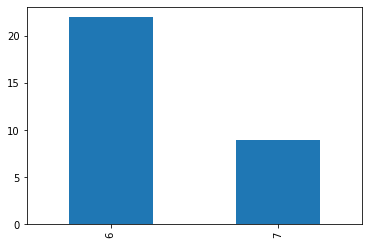

In [ ]:
k['month'].value_counts().plot(kind='bar')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


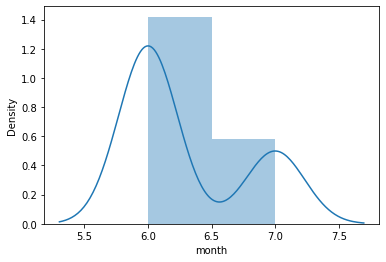

In [ ]:
import seaborn as sns

sns.distplot(k['month'])

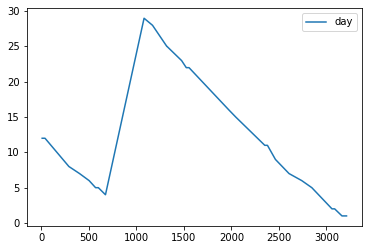

In [ ]:
k.plot(y='day')

In [ ]:
#Wordcloud

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [ ]:
list(STOPWORDS)[0:20]

["you've",
 'after',
 'could',
 'of',
 "you'd",
 'yours',
 'at',
 'here',
 'is',
 'should',
 'however',
 'up',
 'with',
 "i'm",
 'you',
 'are',
 "they've",
 'com',
 "wasn't",
 'then']

In [ ]:
import spacy

In [ ]:
!python -m spacy download el_core_news_sm
!python -m spacy download en_core_web_sm

✔ Download and installation successful
You can now load the model via spacy.load('el_core_news_sm')
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [ ]:
nlp = spacy.load("el_core_news_sm")
nlp_en=spacy.load('en_core_web_sm')

In [ ]:
from spacy.lang.en.stop_words import STOP_WORDS
english_stopwords=list(STOP_WORDS)

print(english_stopwords)


['after', 'across', 'yours', 'around', 'up', 'but', 'his', 'every', 'also', 'anywhere', 'was', 'whereupon', 'somewhere', 'has', 'much', 'someone', 'it', 'further', 'please', 'whatever', 'thru', 'doing', 'only', 'whither', 'yet', 'off', "'s", 'without', 'each', 'so', 'because', 'while', 'onto', 'there', 'my', 'nothing', 'thence', 'me', 'eight', 'and', 'yourselves', 'moreover', "'ve", 'thereafter', 'been', 'everyone', 'i', 'about', 'using', 'he', 'herself', 'say', 'why', 'few', 'nor', 'on', 'among', 'these', 'being', 'before', 'forty', 'whoever', 'afterwards', 'those', 'ourselves', 'fifty', 'noone', '’re', 'side', 'enough', 'next', 'namely', 'n’t', 'became', 'at', 'make', 'n‘t', "'re", 'along', 'then', 'wherein', 'neither', 'twenty', 'least', 'must', 'serious', 'used', 'hereby', 'sometime', 'thus', 'have', 'upon', 'were', 'due', 'once', 'together', 'back', 'which', 'we', 'indeed', 'ours', 'everywhere', 'hereafter', 'thereby', 'whom', 'herein', 'myself', 'our', 'between', 'under', 'will',

In [ ]:
list(nlp.Defaults.stop_words)[0:1000]

['εαυτόν',
 'ταύτος',
 'καθένα',
 'πάνω',
 'τα',
 'τούτο',
 'κάμποσης',
 'ετούτο',
 'αλλιώτικα',
 'όλος',
 'προχθές',
 'κάμποσην',
 'άλλον',
 'ήμασταν',
 'ξανά',
 'οποίο',
 'αλλά',
 'λοιπόν',
 'οσοιδήποτε',
 'έκαστον',
 'εξήσ',
 'μόνη',
 'οποιασδήποτε',
 'ετέρων',
 'εγκαίρως',
 'μερικοί',
 'τέτοιαν',
 'τέτοιος',
 'αυτές',
 'τούτην',
 'κάμποσους',
 'μεν',
 'δικό',
 'όσης',
 'τη',
 'αντίπερα',
 'αυτόν',
 'ορισμένες',
 'οσοδήποτε',
 'εκάστων',
 'κάποιον',
 'οποιδήποτε',
 'ετούτου',
 'τέτοιας',
 'γιατί',
 'άμα',
 'όποιον',
 'κλπ',
 'πολλούς',
 'μόνος',
 'ω',
 'ήμουν',
 'ήταν',
 'καθετί',
 'οσηνδήποτε',
 'έτερο',
 'μόνης',
 'τέτοιου',
 'οσουδήποτε',
 'μετ',
 'εσένα',
 'όλως',
 'αμέσως',
 'εχτές',
 'πόσος',
 'εκείνον',
 'τουλάχιστο',
 'αυτών',
 'τόσον',
 'οσησδήποτε',
 'στο',
 'ολονέν',
 'πρωτύτερα',
 'μόλις',
 'πέρι',
 'πρώτος',
 'στις',
 'οι',
 'τούτοις',
 'όσην',
 'οποίαν',
 'τέτοιο',
 'είσαι',
 'πάρα',
 'έκαστα',
 'κατιτί',
 'ετούτες',
 'έξι',
 'δήθεν',
 'οποιωνδήποτε',
 'πίσω',
 'πρώτο'

In [ ]:
def remove_punctuation(text):
	dict = {
			u"'": "",
			"'": "",
			u",": "",
			",": "",
			u".": "",
			".": "",
			u"``": "",
			"``": "",
			u"''": "",
			"''": "",
			u'"': "",
			'"': "",
			u"[":"",
			"[":"",
			u"]":"",
			"]":"",
			u">": "",
			">": "",
			u"<": "",
			"<": "",
			u";": "",
			";": "",
			u"·": "",
			'·': "",
			u"‘": "",
			"‘": "",
			u"’": "",
			"’": "",
			"–": "",
			u"–": "",
      "και":"",
      ":":"",
      "!":"",
      u";":"",
      "»":"",
      "«":"",
      "%":"",
      " ή ":"",
      " κ ":"",
      " ( ":"",
      " ) ":"",
      " - ":""
			}
	regex = re.compile("(%s)" % "|".join(map(re.escape, dict.keys())))
	return regex.sub(lambda mo: dict[mo.string[mo.start():mo.end()]], text)


In [ ]:
final_text=remove_punctuation(amp_regex)

In [ ]:
gr_stopwords=list(nlp.Defaults.stop_words)
final_stopwords=gr_stopwords+ english_stopwords

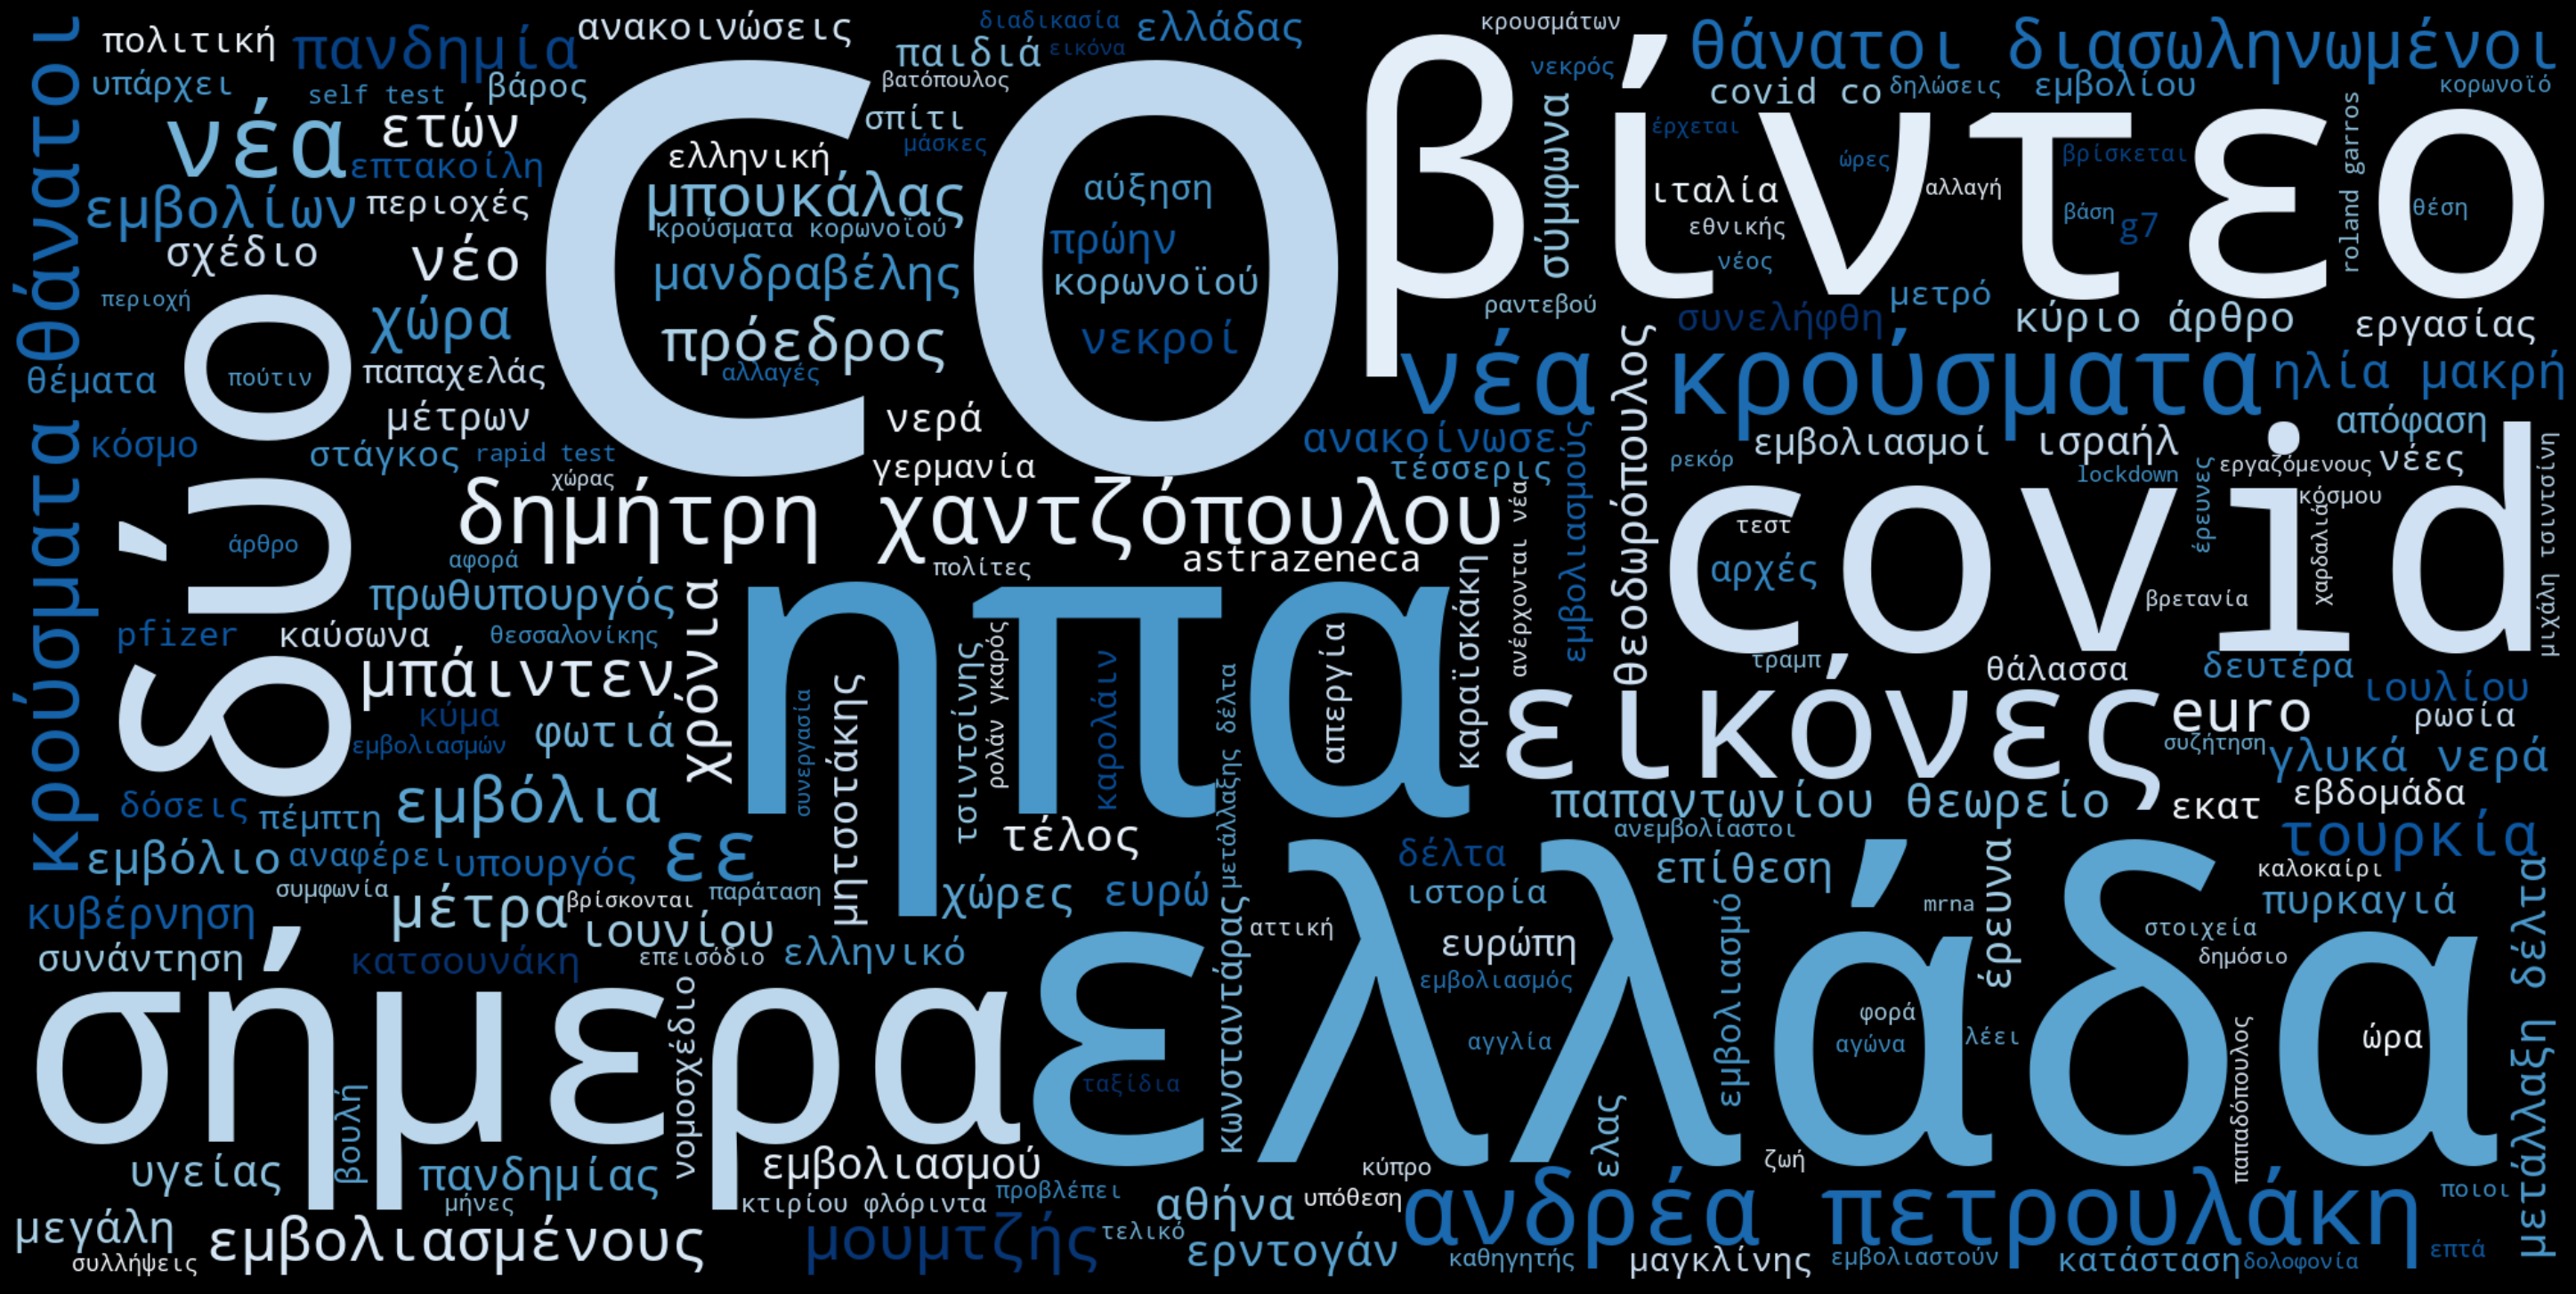

In [ ]:
wordcloud = WordCloud(
    stopwords = final_stopwords,
    width = 2000,
    height = 1000,
    background_color = 'black',
    colormap="Blues"
 ).generate(final_text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
import nltk
nltk.download('punkt')
from nltk import word_tokenize
tweets_tokens = word_tokenize(final_text)
tokens_without_sw = [word for word in tweets_tokens if not word in final_stopwords]

print(tokens_without_sw)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
['επαναπαυόμαστε', 'μήνυμα', 'στέλνει', 'εμφατικά', 'συνέντευξη', 'κ', 'δρ', 'μαριάννα', 'τρίας', 'εκπρόσωπος', 'παγκόσμιου', 'οργανισμού', 'υγείας', 'ελλάδα', 'αφορά', 'μάχη', 'κορωνοϊό', 'ολυμπιακός', 'γαλατασαράι', 'εμπλοκή', 'αεροδρόμιο', 'τεστ', 'τούρκων', 'υποχρεωτικό', 'εμβολιασμό', 'εργαζόμενους', 'υγειονομικό', 'τομέα', 'ανακοίνωσε', 'μακρόν', 'κυρώσεις', 'ακολουθούν', 'απόφαση', 'υγειονομικών', 'εμβολιαστούν', 'αδημονούν', 'ξεκινήσουν', 'ενήλικη', 'ζωή', 'νερά', 'βραβεύτηκαν', 'αστυνομικοί', 'εξιχνίασαν', 'ανθρωποκτονία', 'co/beqqrua0diσε', 'πλήρη', 'εφαρμογή', 'τίθεται', 'σχέδιο', 'προβλέπει', 'υποχρεωτικούς', 'εμβολιασμούς', 'δηλώνει', 'κ', 'πρόεδρος', 'ένωσης', 'μονάδων', 'φροντίδας', 'ηλικιωμένων', 'τζόνσον', 'άρση', 'μέτρων', 'λειτουργήσει', 'προσεκτικοί', 'co/cirvuwniv1αριστείδης', 'χατζής', 'οργή', 'σουλτάνου', 'co/cospdqcbs9ισπανία', 'κορωνοϊός', 'απαγόρευση'

[('(', 213), (')', 213), ('νέα', 84), ('κ', 73), ('2021', 72), ('βίντεο', 72), ('ελλάδα', 69), ('ηπα', 67), ('κρούσματα', 65), ('δύο', 53), ('δέλτα', 47), ('σήμερα', 46), ('ετών', 44), ('covid', 43), ('εικόνες', 43), ('χώρα', 42)]


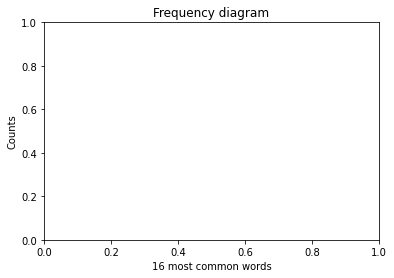

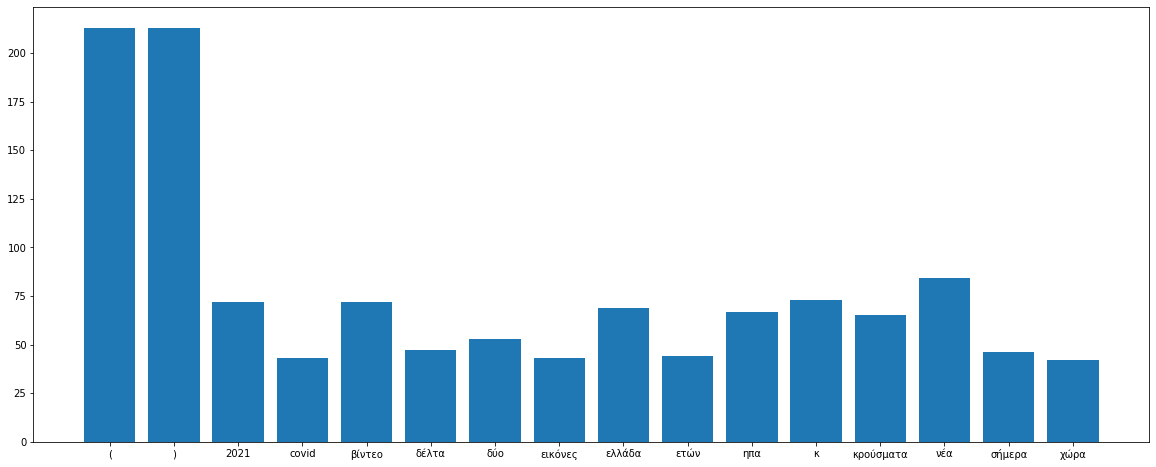

None


In [ ]:
from collections import Counter

most_frequent = Counter(tokens_without_sw).most_common(16)
print(most_frequent) 

def plot_most_frequent(frequent):
    frequent = sorted(frequent, key=lambda pair: pair[0], reverse=False)
    x = list(map(lambda h: h[0], frequent))
    y = list(map(lambda h: h[1], frequent)) 
    
    plt.title("Frequency diagram")
    plt.xlabel("16 most common words")
    plt.ylabel("Counts")
    plt.figure(figsize=(20,8))

    plt.bar(x, y)
    plt.show()
    
print(plot_most_frequent(most_frequent[:16]))

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [ ]:
count_vector = cv.fit_transform(k['text'])

In [ ]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head()

000  12χρονος  16  1η  200  2020  ...  όλη  όλους  όλων  όποιες  όπως  ώρες
0    0         0   0   0    0     0  ...    0      0     0       0     0     0
1    0         0   0   0    0     0  ...    0      0     0       0     0     0
2    0         0   0   0    0     0  ...    0      0     0       0     0     0
3    0         0   0   0    0     0  ...    0      0     0       0     0     0
4    0         0   0   0    0     0  ...    0      0     0       0     0     0

[5 rows x 236 columns]

In [ ]:
cv = CountVectorizer(stop_words= final_stopwords, min_df=0.01, max_df=0.95)

In [ ]:
count_vector = cv.fit_transform(k['text'])

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [ ]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head()

000  12χρονος  16  1η  200  ...  χαλκιδική  χρησιμοποιείται  χωρών  χώρα  ώρες
0    0         0   0   0    0  ...          0                0      0     0     0
1    0         0   0   0    0  ...          0                0      0     0     0
2    0         0   0   0    0  ...          0                0      0     0     0
3    0         0   0   0    0  ...          0                0      0     0     0
4    0         0   0   0    0  ...          0                0      0     0     0

[5 rows x 184 columns]

In [ ]:
from html import unescape
def my_tokenizer(doc):
            
    doc_clean = unescape(doc).lower()
    tokens = nlp(doc_clean)
    lemmatized_tokens = [token.lemma_ for token in tokens if (len(str(token.lemma_))>2)]
            
    return(lemmatized_tokens)

In [ ]:
cv = CountVectorizer(stop_words= final_stopwords, min_df=0.01, max_df=0.95, tokenizer=my_tokenizer) 

In [ ]:
cv = CountVectorizer( stop_words= final_stopwords, max_features=20) 

In [ ]:
results.sum(axis =0).sort_values(ascending = False)

καθημερινη      29
kathimerini     29
covid           26
κορωνοιος       23
κορωνοϊός        6
                ..
μμε              1
μιλάμε           1
μετακινήσεις     1
μεθ              1
000              1
Length: 184, dtype: int64

In [ ]:
sum_words =  results.sum(axis =0)
sum_words.sort_values(ascending = False).head(40)

καθημερινη       29
kathimerini      29
covid            26
κορωνοιος        23
κορωνοϊός         6
μέτρων            4
αύξηση            3
εμβόλια           3
ισραήλ            2
ευρωπαϊκό         2
έρευνα            2
ευρώπη            2
άρση              2
πιστοποιητικό     2
δύο               2
εμβολίων          2
ηπα               2
βρετανία          2
εμβολιάζεται      1
διαθέσιμα         1
δεδομένα          1
εκδηλώσεις        1
εμβολιαστούν      1
εμβολίου          1
ελλάδα            1
ενήλικες          1
ενεργοποιούν      1
ενισχύει          1
εντάσσεται        1
ώρες              1
ετών              1
επίκεντρο         1
επαφή             1
ιουλίου           1
ινστιτούτο        1
ινδίας            1
ιδιοκτήτη         1
θοδωρής           1
θνητότητας        1
θετικών           1
dtype: int64

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words= final_stopwords, max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(k['text'])

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [ ]:
results = pd.DataFrame(tfidf_matrix_train.toarray(), columns=tfidf_vectorizer.get_feature_names()) 
results.head()

000  12χρονος   16   1η  200  ...  χαλκιδική  χρησιμοποιείται  χωρών  χώρα  ώρες
0  0.0       0.0  0.0  0.0  0.0  ...        0.0              0.0    0.0   0.0   0.0
1  0.0       0.0  0.0  0.0  0.0  ...        0.0              0.0    0.0   0.0   0.0
2  0.0       0.0  0.0  0.0  0.0  ...        0.0              0.0    0.0   0.0   0.0
3  0.0       0.0  0.0  0.0  0.0  ...        0.0              0.0    0.0   0.0   0.0
4  0.0       0.0  0.0  0.0  0.0  ...        0.0              0.0    0.0   0.0   0.0

[5 rows x 184 columns]

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity


print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train[0:1], tfidf_matrix_train))

cosine scores ==>  [[1.         0.04069816 0.03654818 0.04420973 0.10259672 0.04281455
  0.1574599  0.03520506 0.0317621  0.08476502 0.09474136 0.03472038
  0.04983428 0.03740459 0.0399545  0.03740459 0.04420973 0.03654818
  0.03472038 0.01723819 0.04420973 0.04513011 0.         0.01928703
  0.04062998 0.         0.02127557 0.0249982  0.1070556  0.034296
  0.03760035]]


In [ ]:
print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train, tfidf_matrix_train))

cosine scores ==>  [[1.         0.04069816 0.03654818 0.04420973 0.10259672 0.04281455
  0.1574599  0.03520506 0.0317621  0.08476502 0.09474136 0.03472038
  0.04983428 0.03740459 0.0399545  0.03740459 0.04420973 0.03654818
  0.03472038 0.01723819 0.04420973 0.04513011 0.         0.01928703
  0.04062998 0.         0.02127557 0.0249982  0.1070556  0.034296
  0.03760035]
 [0.04069816 1.         0.05617899 0.06795573 0.06024112 0.06581116
  0.06854908 0.13752019 0.05805758 0.02541229 0.041245   0.05336944
  0.07660135 0.0574954  0.06141492 0.0574954  0.06795573 0.05617899
  0.05336944 0.03150949 0.06795573 0.06937046 0.01683877 0.11437702
  0.06245322 0.01502242 0.03888937 0.04569393 0.14348983 0.05271713
  0.05779631]
 [0.03654818 0.05617899 1.         0.06102631 0.05409836 0.05910042
  0.06155916 0.04859642 0.05213747 0.02282101 0.03703926 0.04792738
  0.06879034 0.05163261 0.05515246 0.05163261 0.06102631 0.05045044
  0.04792738 0.02829648 0.06102631 0.06229678 0.01512173 0.03165965
  0

In [ ]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)

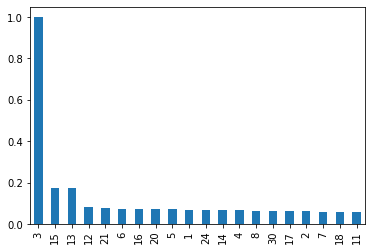

In [ ]:
pd.DataFrame(arr).loc[3].sort_values(ascending = False).head(20).plot(kind = 'bar')

In [ ]:
import matplotlib.pyplot as plt


array([[1.        , 0.04069816, 0.03654818, 0.04420973, 0.10259672,
        0.04281455, 0.1574599 , 0.03520506, 0.0317621 , 0.08476502,
        0.09474136, 0.03472038, 0.04983428, 0.03740459, 0.0399545 ,
        0.03740459, 0.04420973, 0.03654818, 0.03472038, 0.01723819,
        0.04420973, 0.04513011, 0.        , 0.01928703, 0.04062998,
        0.        , 0.02127557, 0.0249982 , 0.1070556 , 0.034296  ,
        0.03760035],
       [0.04069816, 1.        , 0.05617899, 0.06795573, 0.06024112,
        0.06581116, 0.06854908, 0.13752019, 0.05805758, 0.02541229,
        0.041245  , 0.05336944, 0.07660135, 0.0574954 , 0.06141492,
        0.0574954 , 0.06795573, 0.05617899, 0.05336944, 0.03150949,
        0.06795573, 0.06937046, 0.01683877, 0.11437702, 0.06245322,
        0.01502242, 0.03888937, 0.04569393, 0.14348983, 0.05271713,
        0.05779631],
       [0.03654818, 0.05617899, 1.        , 0.06102631, 0.05409836,
        0.05910042, 0.06155916, 0.04859642, 0.05213747, 0.02282101,
      

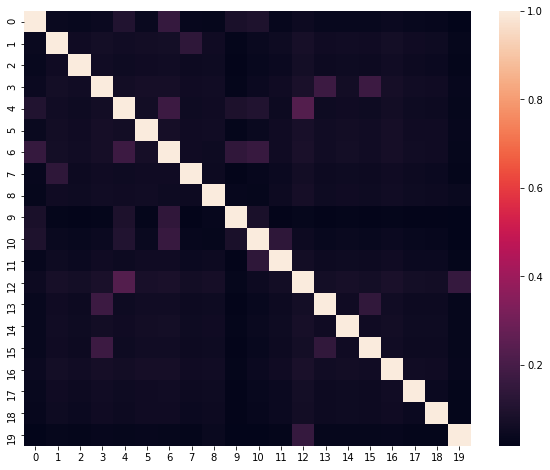

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

plt.figure(figsize= (10,8))
ax = sns.heatmap(cosine_similarity(results.head(20), results.head(20)))
cosine_similarity(X=tfidf_matrix_train, Y=None, dense_output=True)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import glob
import time
import os
import ast
from datetime import datetime
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import numpy as np

import itertools
import re


import nltk
from nltk.corpus import stopwords

In [ ]:
pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",100)

In [ ]:
print("Number of articles scraped (before cleaning): ", k.shape[0])

Number of articles scraped (before cleaning):  31


In [ ]:
k.drop_duplicates(inplace=True)

In [ ]:
k = k.reset_index(drop=True)

In [ ]:
k = k.replace(np.nan, '0')

In [ ]:
k['month'].value_counts().head(10)

6    22
7     9
Name: month, dtype: int64

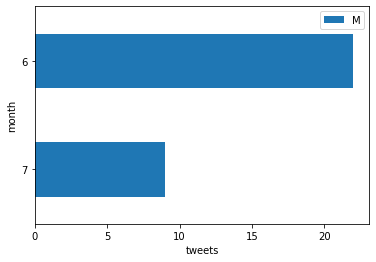

In [ ]:
%matplotlib inline
k['month'].value_counts().head(10).sort_values().plot(kind='barh')
plt.xlabel('tweets')
plt.ylabel('month')
plt.legend('Most tweets per month')

In [ ]:
import string
def clean_text(k):
    clean1 = re.sub(r'['+string.punctuation + '’—”'+']', "", k.lower())
    return re.sub(r'\W+', ' ', clean1)

In [ ]:
k['tokenized'] = k['text'].map(lambda x: clean_text(x))

In [ ]:
import pandas as pd
%matplotlib inline
import numpy as np
import glob
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime

In [ ]:
filepath = "https://raw.githubusercontent.com/datajour-gr/Data_journalism/master/week10/NRC_GREEK_Translated_6_2020.csv"
emolex_df = pd.read_csv(filepath)
emolex_df.head()

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  \
0            αφεση       1.0       0.0    0.0           0.0      0.0   0.0   
1  ενορκη βεβαιωση       0.0       0.0    0.0           0.0      0.0   0.0   
2          εχοντας       0.0       0.0    0.0           0.0      0.0   0.0   
3              εχω       0.0       0.0    0.0           0.0      0.0   0.0   
4             οριο       0.0       0.0    0.0           0.0      0.0   0.0   

   Joy  Sadness  Surprise  Trust  
0  0.0      0.0       0.0    0.0  
1  0.0      0.0       0.0    0.0  
2  0.0      0.0       0.0    0.0  
3  0.0      0.0       0.0    0.0  
4  0.0      0.0       0.0    0.0

In [ ]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True)

In [ ]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word, 
                      strip_accents = 'unicode',  
                      stop_words= final_stopwords,
                      ngram_range=(1, 2))

In [ ]:
matrix = vec.fit_transform(k['text'])
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've', 'αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια', 'βεβαιοτατα', 'γιατι', 'γρηγορα', 'γυρω', 'δεινα', 'δεξια', 'δηθεν', 'δηλαδη', 'διαρκως', 'δικα', 'δικο', 'δικοι', 'δικος', 'δικου', 'δικους', 'διολου', 'διπλα', 'διχως', 'εαν', 'εαυτο', 'εαυτον', 'εαυτου', 'εαυτους', 'εαυτων', 'εγιναν

αφεση  ενορκη βεβαιωση  εχοντας  εχω  οριο  ορμος  υδρα  αγια τραπεζα  \
0      0                0        0    0     0      0     0             0   
1      0                0        0    0     0      0     0             0   
2      0                0        0    0     0      0     0             0   
3      0                0        0    0     0      0     0             0   
4      0                0        0    0     0      0     0             0   

   αμην  απατσι  αυτοκινητοδρομος  αυγουστος  βερολινο  βικτωρια  βοστωνη  \
0     0       0                 0          0         0         0        0   
1     0       0                 0          0         0         0        0   
2     0       0                 0          0         0         0        0   
3     0       0                 0          0         0         0        0   
4     0       0                 0          0         0         0        0   

   γαμηλιο ταξιδι  γεννηση παιδιου  γαιδαρος  γατα  γερμανος  γιαννης  \
0               0                0         0     0         0        0   
1               0                0         0     0         0        0   
2               0                0         0     0         0        0   
3               0                0         0     0         0        0   
4               0                0         0     0         0        0   

   γνωστοποιηση  γυαλια  διακοπη  διευθυντρια σχολειου  διδυμοι  δεξαμενη  \
0             0       0        0                     0        0         0   
1             0       0        0                     0        0         0   
2             0       0        0                     0        0         0   
3             0       0        0                     0        0         0   
4             0       0        0                     0        0         0   

   δευτερα παρουσια  δευτερον  δημοκρατια  διαρκεια ζωης  διαδρομη  \
0                 0         0           0              0         0   
1                 0         0           0              0         0   
2                 0         0           0              0         0   
3                 0         0           0              0         0   
4                 0         0           0              0         0   

   διαλογισμος  διεθνες  διευθυνσεις  δραμα  εξαρτηση  εξωτερικου χωρου  \
0            0        0            0      0         0                 0   
1            0        0            0      0         0                 0   
2            0        0            0      0         0                 0   
3            0        0            0      0         0                 0   
4            0        0            0      0         0                 0   

   επικοινωνω  επιπτωσεις  επιστροφη  εργαστηρι  εγγραφειτε  εκδηλωση  \
0           0           0          0          0           0         0   
1           0           0          0          0           0         0   
2           0           0          0          0           0         0   
3           0           0          0          0           0         0   
4           0           0          0          0           0         0   

   εκθεση ιδεων  εκκλησια  εν τω μεταξυ  ενταση ηχου  επικολληση  εποπτης  \
0             0         0             0            0           0        0   
1             0         0             0            0           0        0   
2             0         0             0            0           0        0   
3             0         0             0            0           0        0   
4             0         0             0            0           0        0   

   ...  εθελοντισμος  κανω εμετο  αναθηματικος  αποδειξη πληρωμης  \
0  ...             0           0             0                  0   
1  ...             0           0             0                  0   
2  ...             0           0             0                  0   
3  ...             0           0             0                  0   
4  ...             0           0             0                

In [ ]:
angry_words = emolex_df[emolex_df.Anger == 1]['word']

positive_words = emolex_df[emolex_df.Positive == 1]['word']


# Φτιάξε μια λίστα με sadness words
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']


# Φτιάξε μια λίστα με surprise words
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']


# Φτιάξε μια λίστα με disgust words
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']


# Φτιάξε μια λίστα με anticipation words
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']


# Φτιάξε μια λίστα με negative words
negative_words = emolex_df[emolex_df.Negative == 1]['word']

# Φτιάξε μια λίστα με joy words
joy_words = emolex_df[emolex_df.Joy == 1]['word']


# Φτιάξε μια λίστα με trust words
trust_words = emolex_df[emolex_df.Trust == 1]['word']



# Φτιάξε μια λίστα με fear words
fear_words = emolex_df[emolex_df.Fear == 1]['word']


In [ ]:
k['anger'] = wordcount_df[angry_words].sum(axis=1)

k['positivity'] = wordcount_df[positive_words].sum(axis=1)


k['joy'] = wordcount_df[joy_words].sum(axis=1)


k['disgust'] = wordcount_df[disgust_words].sum(axis=1)



k['surprise'] = wordcount_df[surprise_words].sum(axis=1)

k['trust'] = wordcount_df[trust_words].sum(axis=1)


k['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)


k['sadness'] = wordcount_df[sadness_words].sum(axis=1)

k['negative'] = wordcount_df[negative_words].sum(axis=1)

k['fear'] = wordcount_df[fear_words].sum(axis=1)


In [ ]:
k

date                                               text  \
0  2021-07-12 17:20:21  Ισπανία – Κορωνοϊός: Απαγόρευση της νυχτερινής...   
1  2021-07-12 13:14:09  Ολλανδία: Ο Ρούτε ζητά συγγνώμη για τη χαλάρωσ...   
2  2021-07-08 19:39:51  Πηγές υπ. Ναυτιλίας: Ανυπόστατα τα περί επιβίβ...   
3  2021-07-07 11:23:23  Γλυφάδα: Αύξηση των θετικών τεστ Covid κατά 8,...   
4  2021-07-06 07:39:53  Κορωνοϊός: Ισραήλ και Νότια Κορέα συμφώνησαν γ...   
5  2021-07-05 09:42:37  Σε αυτοαπομόνωση η Κέιτ Μίντλετον μετά από επα...   
6  2021-07-05 05:52:23  Μπάιντεν: Ο κορωνοϊός δεν έχει ακόμη νικηθεί #...   
7  2021-07-05 05:17:07  Νέα δεδομένα ισχύουν από σήμερα σε όλη τη χώρα...   
8  2021-07-04 10:00:40  Θοδωρής Γεωργακόπουλος: Πώς μιλάμε για την COV...   
9  2021-06-29 10:06:32  Τόκιο 2020: Ο κορωνοϊός «κρύβει» την Ολυμπιακή...   
10 2021-06-28 10:37:13  Βρετανία – Κορωνοϊός: Ο νέος υπ. Υγείας θέλει ...   
11 2021-06-25 17:47:28  Βρετανία: Μόνο 28 κρούσματα Covid στους 58.000...   
12 2021-06-25 17:32:40  ΠΟΥ: Προς έγκριση δύο ακόμη εμβολίων Covid εντ...   
13 2021-06-23 13:19:51  Τουρισμός: Η Ryanair βλέπει ταχεία αύξηση στα ...   
14 2021-06-22 21:09:32  ΗΠΑ: Οι λόγοι που οι νεότεροι ενήλικες είναι λ...   
15 2021-06-22 18:44:33  Η αύξηση του αριθμού των ασθενών με Covid που ...   
16 2021-06-22 13:40:50  Σουηδία: Τα εμβόλια Covid θα είναι διαθέσιμα γ...   
17 2021-06-16 12:12:45  Ιταλικά ΜΜΕ: Προς παράταση της κατάστασης έκτα...   
18 2021-06-15 17:14:54  Ο Περσεβάλ Γκετ, ένας 12χρονος Γάλλος, είναι έ...   
19 2021-06-11 10:41:02  Μια λέαινα πέθανε από Covid και δύο λιοντάρια ...   
20 2021-06-11 07:17:25  G7: Εμβόλια Covid και κλίμα στο επίκεντρο των ...   
21 2021-06-09 15:46:34  Γερμανική έρευνα: Οι ηλικιωμένοι ανταποκρίνοντ...   
22 2021-06-07 20:55:02  «Το Ευρωπαϊκό Πιστοποιητικό COVID θα χρησιμοπο...   
23 2021-06-06 12:08:37  Χαλκιδική: Πρόστιμο 3.300 ευρώ σε ιδιοκτήτη κα...   
24 2021-06-05 05:25:53  ΗΠΑ: Αεροπορικές πιέζουν για άρση των περιορισ...   
25 2021-06-02 14:22:51  Αγρίνιο: Αυξημένο ποσοστό θνητότητας στη ΜΕΘ C...   
26 2021-06-02 08:53:58  Γ. Γεωργαντάς: 81.200 ευρωπαϊκά πιστοποιητικά ...   
27 2021-06-01 12:24:20  CNN: Η Μύκονος είναι έτοιμη για πάρτι όπως στη...   
28 2021-06-01 08:14:01  Ισραήλ – Κορωνοϊός: Άρση σχεδόν όλων των μέτρω...   
29 2021-06-01 06:32:05  Γουχάν: Το Ινστιτούτο Βιολογικών Προϊόντων ενι...   
30 2021-06-01 04:35:58  Η Ελλάδα εντάσσεται στο πρώτο κύμα των χωρών π...   

    year  month  day                                          tokenized  \
0   2021      7   12  ισπανία κορωνοϊός απαγόρευση της νυχτερινής κυ...   
1   2021      7   12  ολλανδία ο ρούτε ζητά συγγνώμη για τη χαλάρωση...   
2   2021      7    8  πηγές υπ ναυτιλίας ανυπόστατα τα περί επιβίβασ...   
3   2021      7    7  γλυφάδα αύξηση των θετικών τεστ covid κατά 849...   
4   2021      7    6  κορωνοϊός ισραήλ και νότια κορέα συμφώνησαν γι...   
5   2021      7    5  σε αυτοαπομόνωση η κέιτ μίντλετον μετά από επα...   
6   2021      7    5  μπάιντεν ο κορωνοϊός δεν έχει ακόμη νικηθεί ka...   
7   2021      7    5  νέα δεδομένα ισχύουν από σήμερα σε όλη τη χώρα...   
8   2021      7    4  θοδωρής γεωργακόπουλος πώς μιλάμε για την covi...   
9   2021      6   29  τόκιο 2020 ο κορωνοϊός κρύβει την ολυμπιακή φλ...   
10  2021      6   28  βρετανία κορωνοϊός ο νέος υπ υγείας θέλει να α...   
11  2021      6   25  βρετανία μόνο 28 κρούσματα covid στους 58000 σ...   
12  2021      6   25  που προς έγκριση δύο ακόμη εμβολίων covid εντό...   
13  2021      6   23  τουρισμός η ryanair βλέπει ταχεία αύξηση στα τ...   
14  2021      6   22  ηπα οι λόγοι που οι νεότεροι ενήλικες είναι λι...   
15  2021      6   22  η αύξηση του αριθμού των ασθενών με covid που ...   
16  2021      6   22  σουηδία τα εμβόλια covid θα είναι διαθέσιμα γι...   
17  2021      6   16  ιταλικά μμε προς παράταση της κατάστασης έκτακ...   
18  2021      6   15  ο περσεβάλ γκετ ένας 12χρονος γάλλος είναι ένα...   
19  2021      6   11  μια λέαινα πέθανε από covid και

In [ ]:
k.set_index('date' , inplace=True)

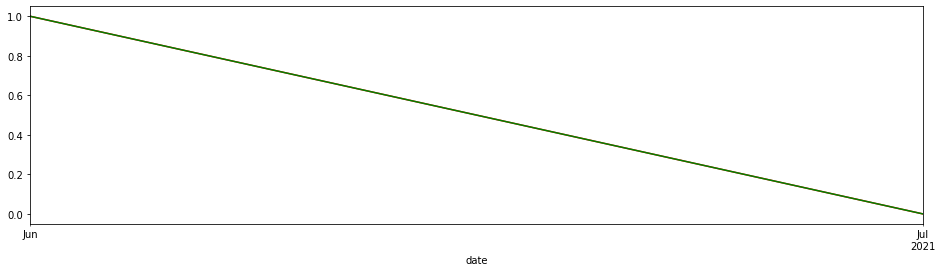

In [ ]:
ax = k['anger'].resample('M').sum().plot(figsize=(16,4), color = 'red')
k['joy'].resample('M').sum().plot(figsize=(16,4), ax = ax, color = 'green')

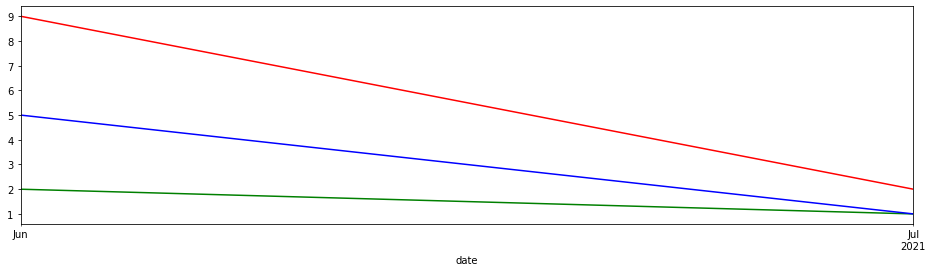

In [ ]:
ax = k['positivity'].resample('M').sum().plot(figsize=(16,4), color = 'red')
k['negative'].resample('M').sum().plot(figsize=(16,4), ax = ax, color = 'green')
k['trust'].resample('M').sum().plot(figsize=(16,4), ax = ax, color = 'blue')

In [ ]:
pip install vaderSentiment

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
k['text'] = k['text'].apply(analyzer.polarity_scores)
pd.concat([k.drop(['text'], axis=1), k['text'].apply(pd.Series)], axis=1)

year  month  day  \
date                                    
2021-07-12 17:20:21  2021      7   12   
2021-07-12 13:14:09  2021      7   12   
2021-07-08 19:39:51  2021      7    8   
2021-07-07 11:23:23  2021      7    7   
2021-07-06 07:39:53  2021      7    6   
2021-07-05 09:42:37  2021      7    5   
2021-07-05 05:52:23  2021      7    5   
2021-07-05 05:17:07  2021      7    5   
2021-07-04 10:00:40  2021      7    4   
2021-06-29 10:06:32  2021      6   29   
2021-06-28 10:37:13  2021      6   28   
2021-06-25 17:47:28  2021      6   25   
2021-06-25 17:32:40  2021      6   25   
2021-06-23 13:19:51  2021      6   23   
2021-06-22 21:09:32  2021      6   22   
2021-06-22 18:44:33  2021      6   22   
2021-06-22 13:40:50  2021      6   22   
2021-06-16 12:12:45  2021      6   16   
2021-06-15 17:14:54  2021      6   15   
2021-06-11 10:41:02  2021      6   11   
2021-06-11 07:17:25  2021      6   11   
2021-06-09 15:46:34  2021      6    9   
2021-06-07 20:55:02  2021      6    7   
2021-06-06 12:08:37  2021      6    6   
2021-06-05 05:25:53  2021      6    5   
2021-06-02 14:22:51  2021      6    2   
2021-06-02 08:53:58  2021      6    2   
2021-06-01 12:24:20  2021      6    1   
2021-06-01 08:14:01  2021      6    1   
2021-06-01 06:32:05  2021      6    1   
2021-06-01 04:35:58  2021      6    1   

                                                             tokenized  anger  \
date                                                                            
2021-07-12 17:20:21  ισπανία κορωνοϊός απαγόρευση της νυχτερινής κυ...      0   
2021-07-12 13:14:09  ολλανδία ο ρούτε ζητά συγγνώμη για τη χαλάρωση...      0   
2021-07-08 19:39:51  πηγές υπ ναυτιλίας ανυπόστατα τα περί επιβίβασ...      0   
2021-07-07 11:23:23  γλυφάδα αύξηση των θετικών τεστ covid κατά 849...      0   
2021-07-06 07:39:53  κορωνοϊός ισραήλ και νότια κορέα συμφώνησαν γι...      0   
2021-07-05 09:42:37  σε αυτοαπομόνωση η κέιτ μίντλετον μετά από επα...      0   
2021-07-05 05:52:23  μπάιντεν ο κορωνοϊός δεν έχει ακόμη νικηθεί ka...      0   
2021-07-05 05:17:07  νέα δεδομένα ισχύουν από σήμερα σε όλη τη χώρα...      0   
2021-07-04 10:00:40  θοδωρής γεωργακόπουλος πώς μιλάμε για την covi...      0   
2021-06-29 10:06:32  τόκιο 2020 ο κορωνοϊός κρύβει την ολυμπιακή φλ...      1   
2021-06-28 10:37:13  βρετανία κορωνοϊός ο νέος υπ υγείας θέλει να α...      0   
2021-06-25 17:47:28  βρετανία μόνο 28 κρούσματα covid στους 58000 σ...      0   
2021-06-25 17:32:40  που προς έγκριση δύο ακόμη εμβολίων covid εντό...      0   
2021-06-23 13:19:51  τουρισμός η ryanair βλέπει ταχεία αύξηση στα τ...      0   
2021-06-22 21:09:32  ηπα οι λόγοι που οι νεότεροι ενήλικες είναι λι...      0   
2021-06-22 18:44:33  η αύξηση του αριθμού των ασθενών με covid που ...      0   
2021-06-22 13:40:50  σουηδία τα εμβόλια covid θα είναι διαθέσιμα γι...      0   
2021-06-16 12:12:45  ιταλικά μμε προς παράταση της κατάστασης έκτακ...      0   
2021-06-15 17:14:54  ο περσεβάλ γκετ ένας 12χρονος γάλλος είναι ένα...      0   
2021-06-11 10:41:02  μια λέαινα πέθανε από covid και δύο λιοντάρια ...      0   
2021-06-11 07:17:25  g7 εμβόλια covid και κλίμα στο επίκεντρο των σ...      0   
2021-06-09 15:46:34  γερμανική έρευνα οι ηλικιωμένοι ανταποκρίνοντα...      0   
2021-06-07 20:55:02   το ευρωπαϊκό πιστοποιητικό covid θα χρησιμοπο...      0   
2021-06-06 12:08:37  χαλκιδική πρόστιμο 3300 ευρώ σε ιδιοκτήτη καφέ...      0   
2021-06-05 05:25:53  ηπα αεροπορικές πιέζουν για άρση των περιορισμ...      0   
2021-06-02 14:22:51  αγρίνιο αυξημένο ποσοστό θνητότητας στη μεθ co...      0   
2021-06-02 08:53:58  γ γεωργαντάς 81200 ευρωπαϊκά πιστοποιητικά cov...      0   
2021-06-01 12:24:20  cnn η μύκονος είναι έτοιμη για πάρτι όπως στην...      0   
2021-06-01 08:14:01  ισραήλ κορωνοϊός άρση σχεδόν όλων των μέτρων π...      0   
2021-06-01 06:32:05  γουχάν το ινστιτούτο βιολογικών προϊόντων ενισ...      0   
2021-06-01 04:35:58  η ελλάδα εντάσσεται στο πρώτο κύμα των χωρών π...     

In [ ]:
k.head

<bound method NDFrame.head of                                                                   text  year  \
date                                                                           
2021-07-12 17:20:21  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  2021   
2021-07-12 13:14:09  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  2021   
2021-07-08 19:39:51  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  2021   
2021-07-07 11:23:23  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  2021   
2021-07-06 07:39:53  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  2021   
2021-07-05 09:42:37  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  2021   
2021-07-05 05:52:23  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  2021   
2021-07-05 05:17:07  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  2021   
2021-07-04 10:00:40  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  2021   
2021-06-29 10:06:32  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  2021   
2021-06-28

In [ ]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))

In [ ]:
from textblob import TextBlob, Word

#def detect_polarity(text):
#    return TextBlob(text).sentiment.polarity
def detect_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [ ]:
k.to_csv('kathimerini_tweets.csv', index = False)